In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix , accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
atp1 = pd.read_csv("atp_clean.csv")
atp1.head(2)

,WRank,LRank,Wsets,elo_winner,elo_loser,proba_elo,Month,Year,Favori_win,PSW_prob,...,Surface_Clay,Surface_Grass,Surface_Hard,Round_2nd Round,Round_3rd Round,Round_4th Round,Round_Quarterfinals,Round_Round Robin,Round_Semifinals,Round_The Final
0,73,103,2.0,1363.825637,1468.054396,0.354346,6,2002,0,0.46,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98,176,2.0,1476.562944,1364.442466,0.655977,6,2002,1,0.59,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Score sur ensemble train 0.9275094122902175
Score sur ensemble test 0.928662582950485
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      2596
           1       0.92      0.98      0.95      5240

    accuracy                           0.93      7836
   macro avg       0.93      0.90      0.92      7836
weighted avg       0.93      0.93      0.93      7836



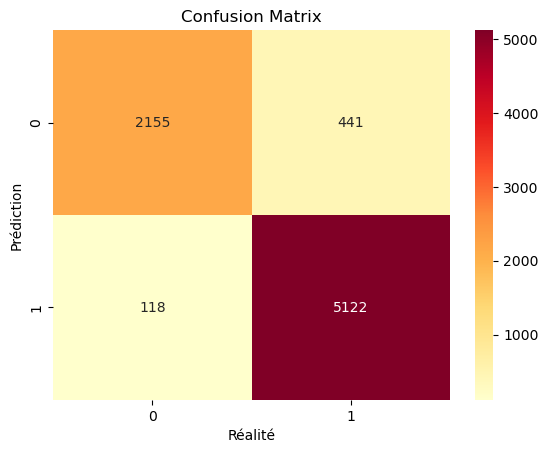

In [10]:
# Réduction du nombre de variables
var_new = ['Favori_win','WRank', 'elo_loser', 'elo_winner', 'LRank']
atp_new = atp1[var_new]

# RandomForestClassifier sur les 4 variables et parametrage du modèle
X = atp_new.drop(['Favori_win'] , axis=1)
y = atp_new['Favori_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model_RF4V = RandomForestClassifier(n_estimators=30, max_depth=3, random_state = 42)
model_RF4V.fit(X_train, y_train)
print('Score sur ensemble train', model_RF4V.score(X_train, y_train))
print('Score sur ensemble test', model_RF4V.score(X_test, y_test))

y_pred = model_RF4V.predict(X_test)

print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap = 'YlOrRd')
plt.title("Confusion Matrix")
plt.xlabel("Réalité")
plt.ylabel("Prédiction")
plt.savefig('Confusion_Matrix_RFC.png', bbox_inches="tight")

In [13]:
pickle_out = open("rf_model.pkl","wb")
pickle.dump(model_RF4V, pickle_out)
pickle_out.close()